# Table of Contents

1. Data import

2. Regions, profiles and relations

3. Items, deparments, profiles and relations

4. Additional visualisations

# 1. Data import

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

path = r'/Users/jakubkondelka/Documents/CF_Instacart Basket Analysis'

tothemoon = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'iloveyou.pkl'))

In [2]:
# basic data check
tothemoon.shape

(30964564, 41)

In [3]:
tothemoon.head()

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,...,frequency_flag,department,region,Low Spender,age_profile,income_profile,dependant_profile,alcohol_flag,international_flag,baby_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regular customer,beverages,Midwest,NO,Middle aged,High income,dependants,0,0,0
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regular customer,beverages,Midwest,NO,Middle aged,High income,dependants,0,0,0
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regular customer,beverages,Midwest,NO,Middle aged,High income,dependants,0,0,0
3,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,Non frequent customer,beverages,West,NO,Middle aged,Middle income,no dependants,0,0,0
4,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,Non frequent customer,beverages,West,NO,Middle aged,Middle income,no dependants,0,0,0


In [103]:
tothemoon['loyalty_flag'].info

<bound method Series.info of 0               New customer
1               New customer
2               New customer
3           Regular customer
4           Regular customer
                  ...       
32404852    Regular customer
32404855        New customer
32404856        New customer
32404857        New customer
32404858        New customer
Name: loyalty_flag, Length: 30964564, dtype: object>

In [2]:
# import data set with unique customers 
bereal = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'truthbetold.pkl'))

In [5]:
# basic checks
bereal.shape

(162631, 41)

# 2. Regions and customer profiles comparison

## 2a Age profiles

In [5]:
# Customer age profiles in each region
age_region=pd.crosstab(bereal['region'], bereal['age_profile'].sort_values(ascending=False))
age_region

age_profile,Middle aged,Old folks,Young
region,,,
Midwest,21145,10169,7062
Northeast,15740,7580,5261
South,29493,14433,10267
West,22627,11068,7786


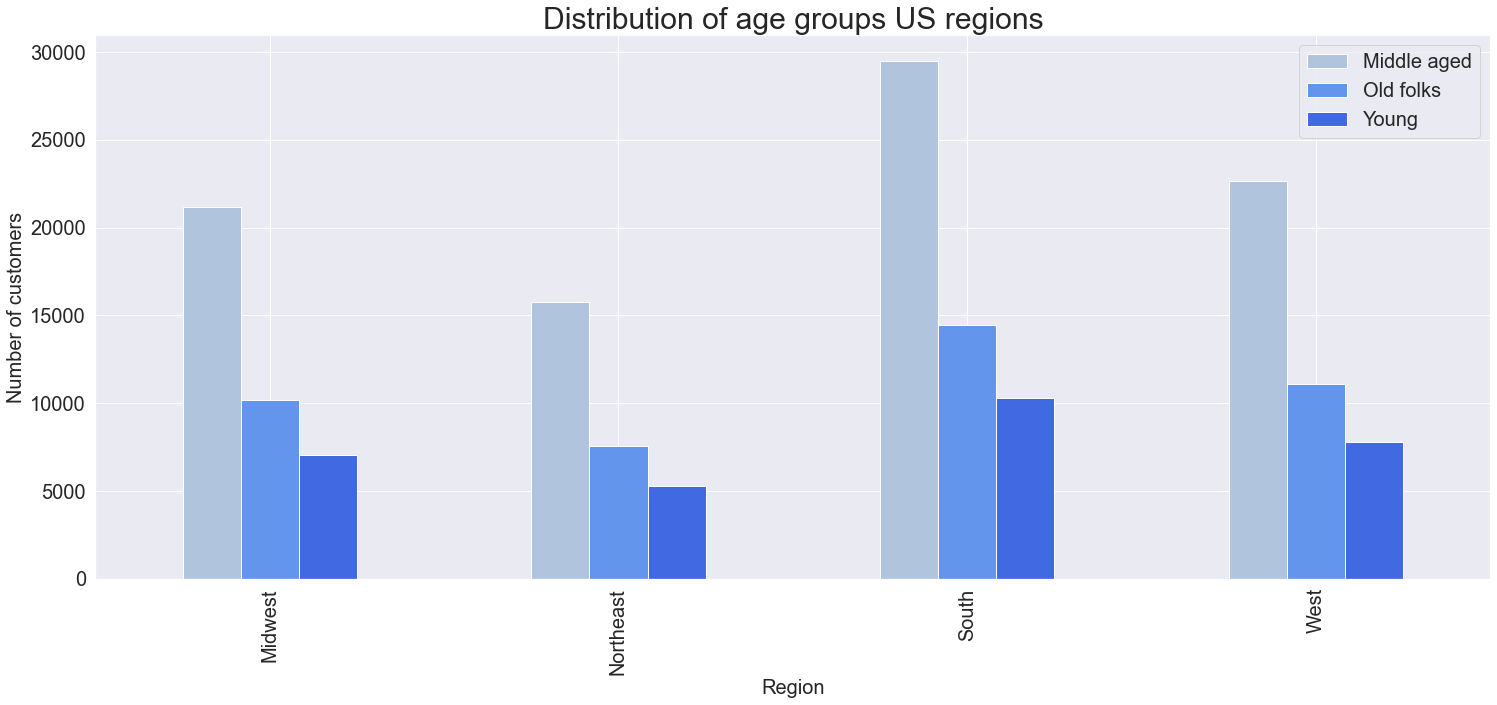

In [6]:
# Bar chart 

# Setting script figure size to 25,10
sns.set(rc = {'figure.figsize':(25,10)})
# Grouped bar chart of customer age groups and regions
bar_age_region=age_region.plot.bar(color=['lightsteelblue', 'cornflowerblue','royalblue'], fontsize=20)
plt.title('Distribution of age groups US regions', fontsize=30)
plt.xlabel('Region', fontsize=20)
plt.ylabel('Number of customers', fontsize=20)
plt.legend(fontsize=20)

In [91]:
# Export bar chart

bar_age_region.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'age_groups_regions.png'))

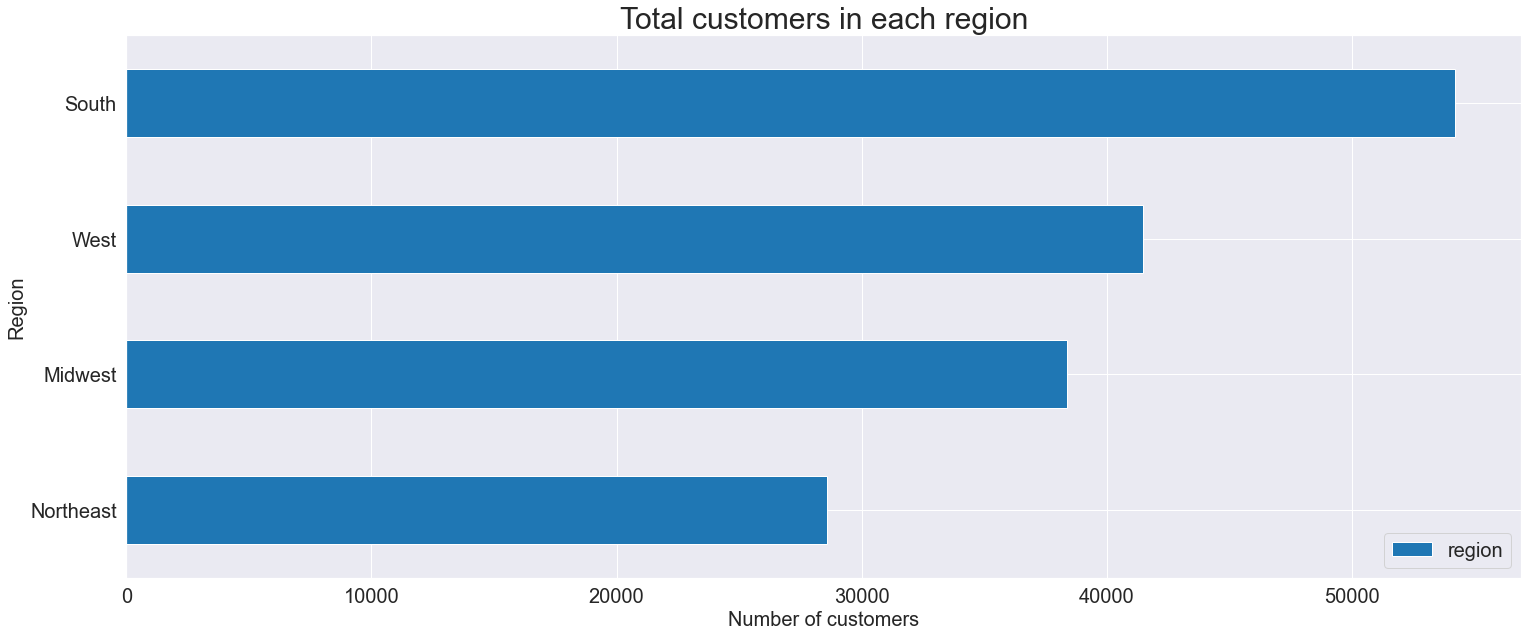

In [47]:
# Total customers across regions
bar_total_customers=bereal['region'].value_counts(dropna=False).sort_values(ascending=True).plot.barh(colormap='tab10', fontsize=20)
plt.title('Total customers in each region', fontsize=30)
plt.xlabel('Number of customers', fontsize=20)
plt.ylabel('Region', fontsize=20)
plt.legend(fontsize=20)

In [48]:
# Export bar chart

bar_total_customers.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_total_customers.png'))

In [83]:
# Income groups by regions

# Customer income profiles in each region
income_region=pd.crosstab(bereal['region'], bereal['income_profile'].sort_values(ascending=False))
age_region


age_profile,Middle aged,Old folks,Young
region,,,
Midwest,21145,10169,7062
Northeast,15740,7580,5261
South,29493,14433,10267
West,22627,11068,7786


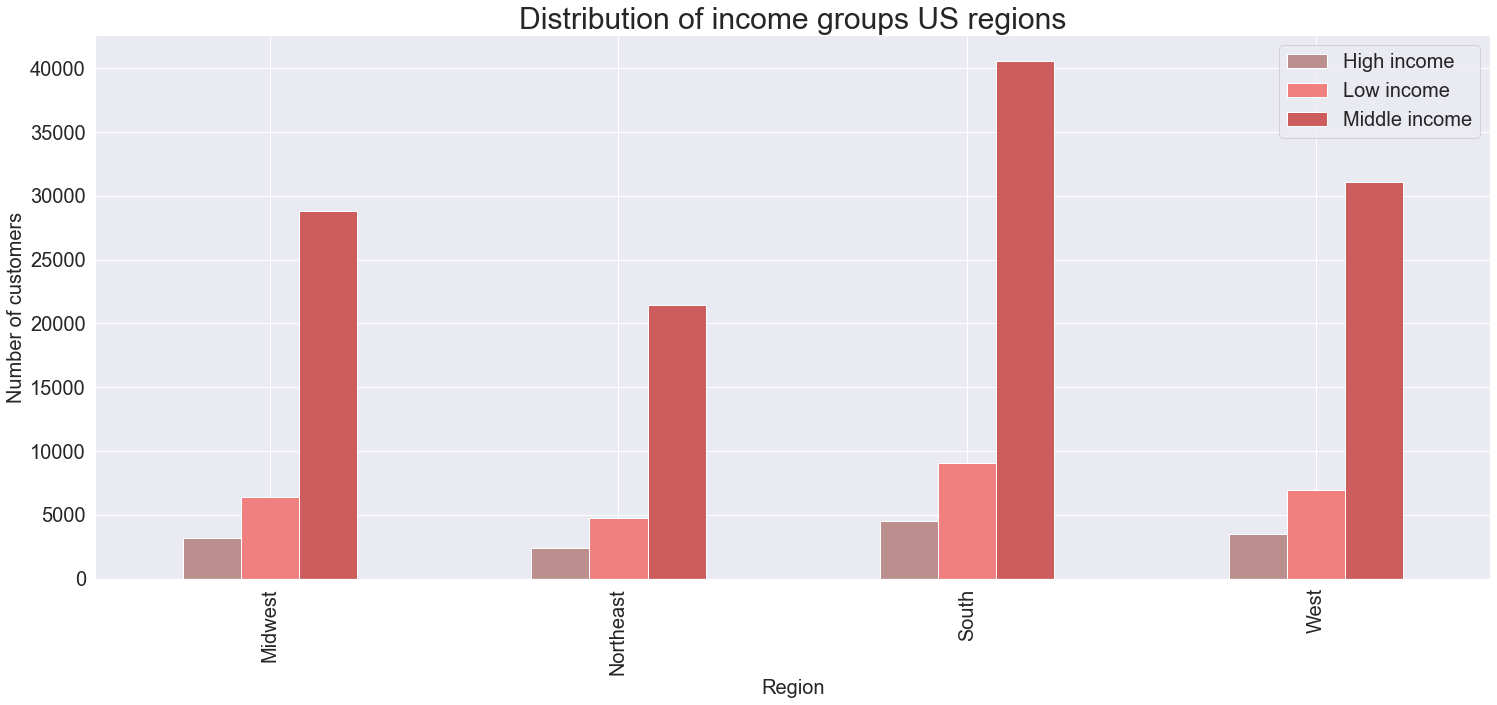

In [95]:
# Grouped bar chart of customer income groups and regions
bar_income_region=income_region.plot.bar(color=['rosybrown', 'lightcoral','indianred'], fontsize=20)
plt.title('Distribution of income groups US regions', fontsize=30)
plt.xlabel('Region', fontsize=20)
plt.ylabel('Number of customers', fontsize=20)
plt.legend(fontsize=20)

In [96]:
# Export bar chart

bar_income_region.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'income_groups_regions.png'))

In [94]:
# Number of dependants groups comparison by regions

# Crosst tab number of dependants in each region
dependants_region=pd.crosstab(bereal['region'], bereal['dependant_profile'].sort_values(ascending=False))
dependants_region


dependant_profile,dependants,no dependants
region,,
Midwest,28810,9566
Northeast,21326,7255
South,40656,13537
West,31112,10369


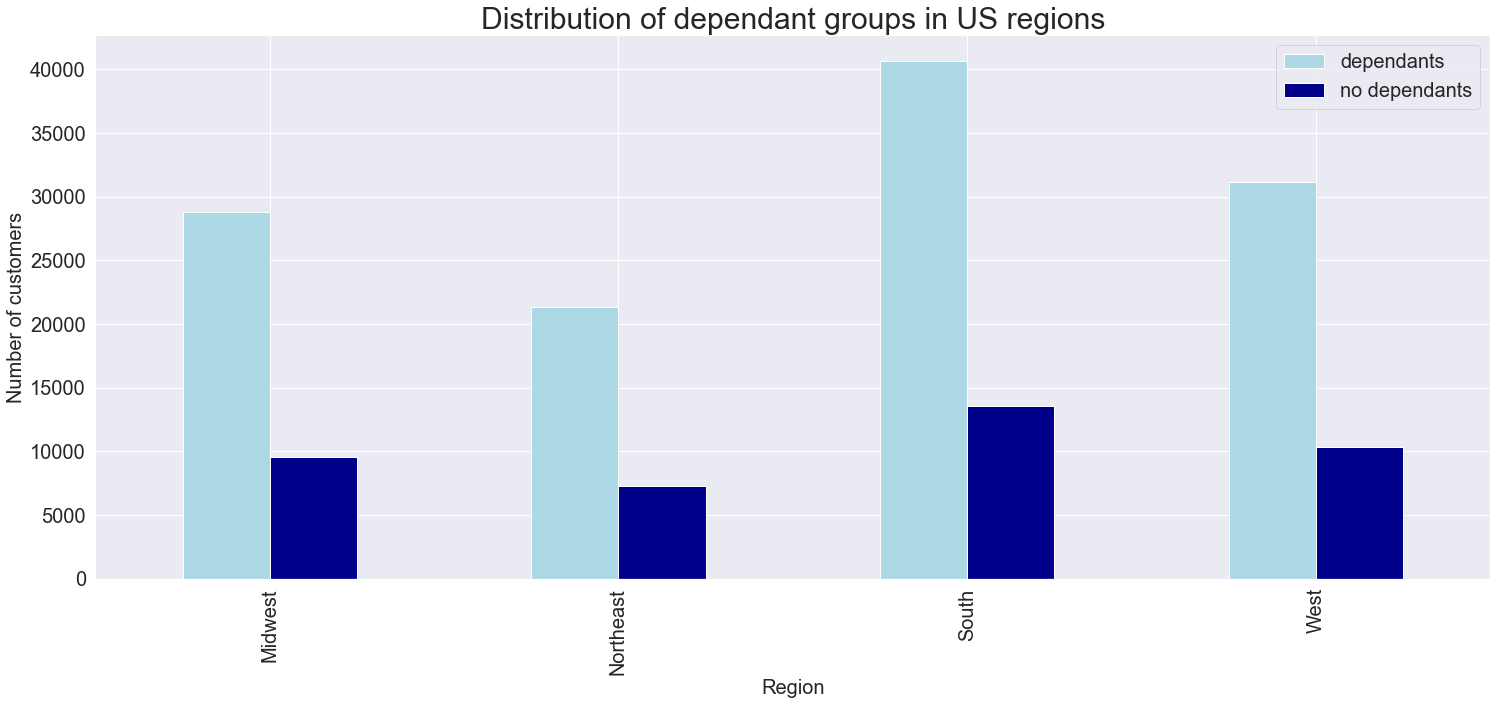

In [98]:
# Grouped bar chart of number of dependants by regions
bar_dependant_region=dependants_region.plot.bar(color=['lightblue', 'darkblue'], fontsize=20)
plt.title('Distribution of dependant groups in US regions', fontsize=30)
plt.xlabel('Region', fontsize=20)
plt.ylabel('Number of customers', fontsize=20)
plt.legend(fontsize=20)

In [99]:
# Export bar chart

bar_dependant_region.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'dependant_groups_regions.png'))

In [55]:
# Loyalty comparison by regions

# Crosst tab number loyalty each region
loyalty_region=pd.crosstab(bereal['region'], bereal['loyalty_flag'].sort_values(ascending=False), normalize='index')
loyalty_region

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,0.103997,0.421878,0.474124
Northeast,0.105910,0.422029,0.472062
South,0.104017,0.423431,0.472552
West,0.105157,0.423109,0.471734


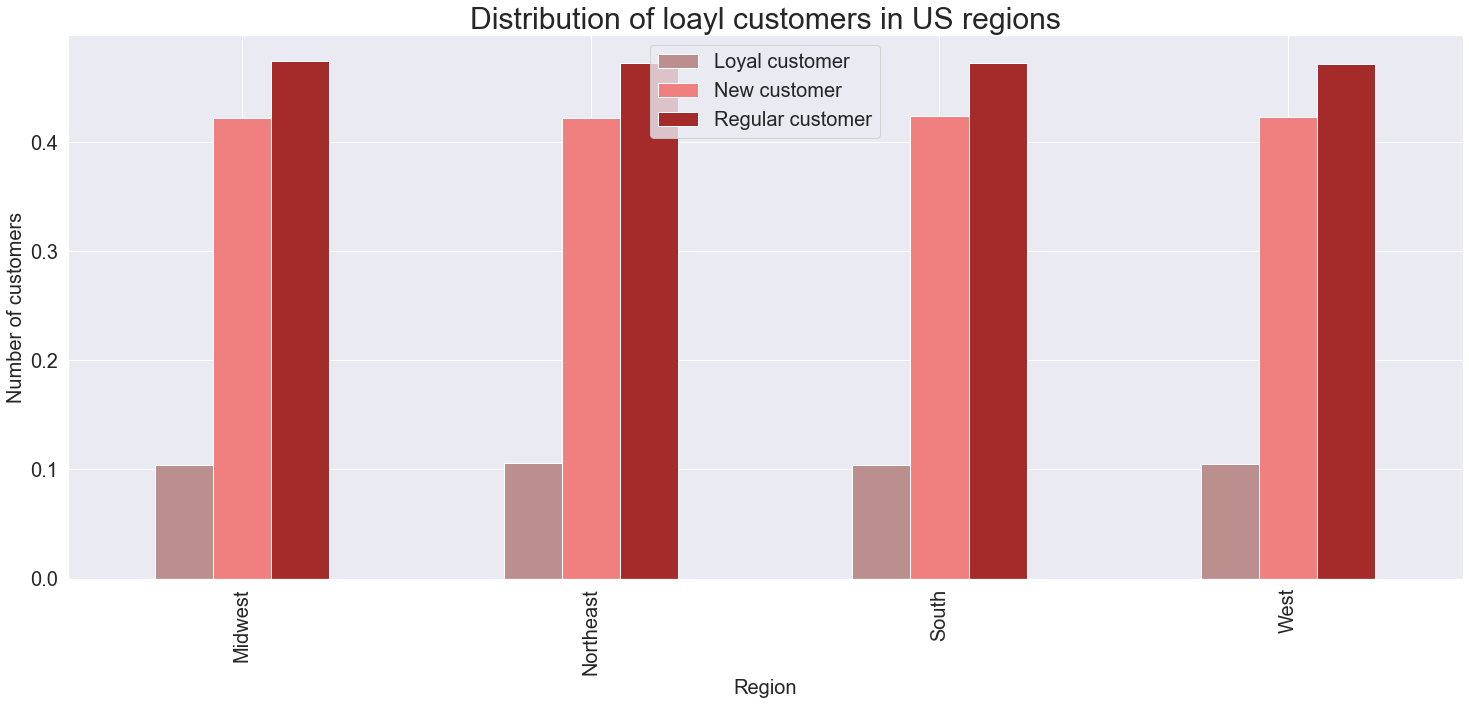

In [56]:
# Grouped bar chart of loyalty by regions
bar_loyalty_region=loyalty_region.plot.bar(color=['rosybrown', 'lightcoral', 'brown'], fontsize=20)
plt.title('Distribution of loayl customers in US regions', fontsize=30)
plt.xlabel('Region', fontsize=20)
plt.ylabel('Number of customers', fontsize=20)
plt.legend(fontsize=20)

In [106]:
# Export bar chart

bar_loyalty_region.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'loyalty_regions.png'))

In [53]:
# Product price range comparison by regions

# Crosst tab product price range
ppr_region=pd.crosstab(bereal['region'], bereal['price_range_loc'].sort_values(ascending=False), normalize="index")
ppr_region

price_range_loc,High-range product,Low-range product,Mid-range product
region,,,
Midwest,0.000104,0.317047,0.682849
Northeast,0.000140,0.320563,0.679297
South,0.000092,0.320909,0.678999
West,0.000217,0.317736,0.682047


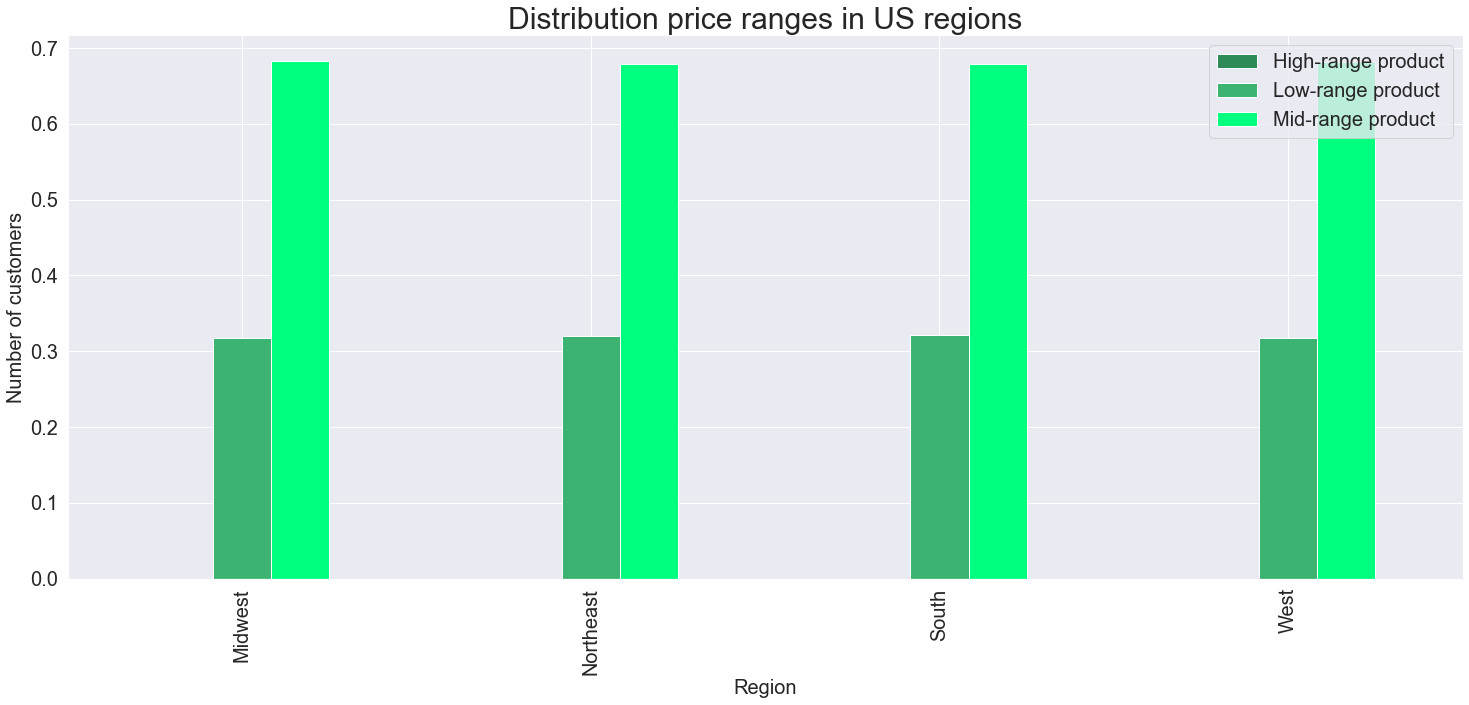

In [51]:
# Grouped bar chart of price range products by regions
bar_ppr_region=ppr_region.plot.bar(color=['seagreen', 'mediumseagreen', 'springgreen'], fontsize=20)
plt.title('Distribution price ranges in US regions', fontsize=30)
plt.xlabel('Region', fontsize=20)
plt.ylabel('Number of customers', fontsize=20)
plt.legend(fontsize=20)

In [109]:
# Export bar chart

bar_ppr_region.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'ppr_regions.png'))

In [64]:
# Department orders by regions

# Crosst tab
orders_region=pd.crosstab(tothemoon['department'], tothemoon['region'].sort_values(ascending=False))
orders_region

region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


Text(0.5, 0, 'Departments')

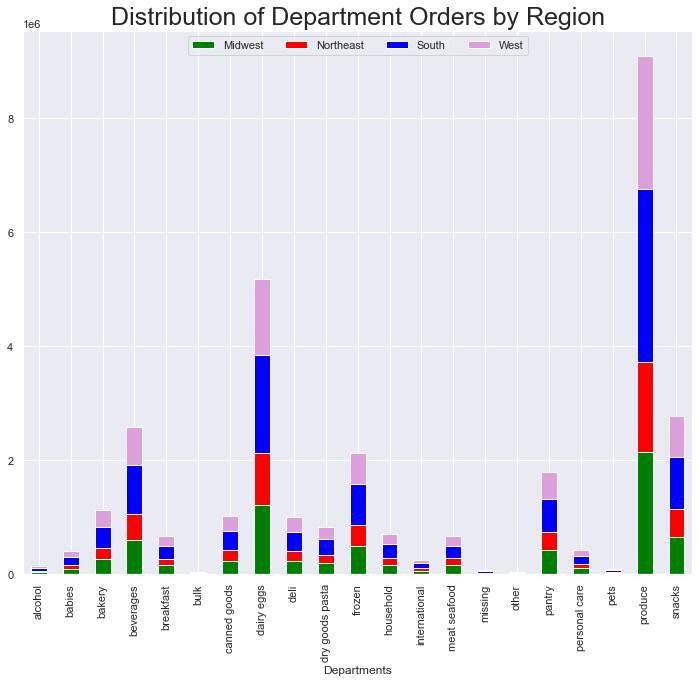

In [65]:
# stacked bar chart for dept_region distribution
stacked_dept_region=orders_region.plot(kind='bar', 
                        stacked=True, 
                        color=['green','red','blue','plum'], 
                        figsize=(12,10))

plt.title('Distribution of Department Orders by Region', fontsize=25)
plt.legend(loc="upper center", ncol=4)
plt.xlabel("Departments")


In [67]:
# Export stacked bar chart

stacked_dept_region.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'stacked_dept_region.png'))

#### Family status across region distribution

In [140]:
# crosstab on family status across region
cross_famstat_region=pd.crosstab(index=bereal['region'],
                             columns=bereal['fam_status'],
                             normalize="index")
# crosstab to display labels
famstat_region_labels=pd.crosstab(index=bereal['region'],columns=bereal['fam_status'])

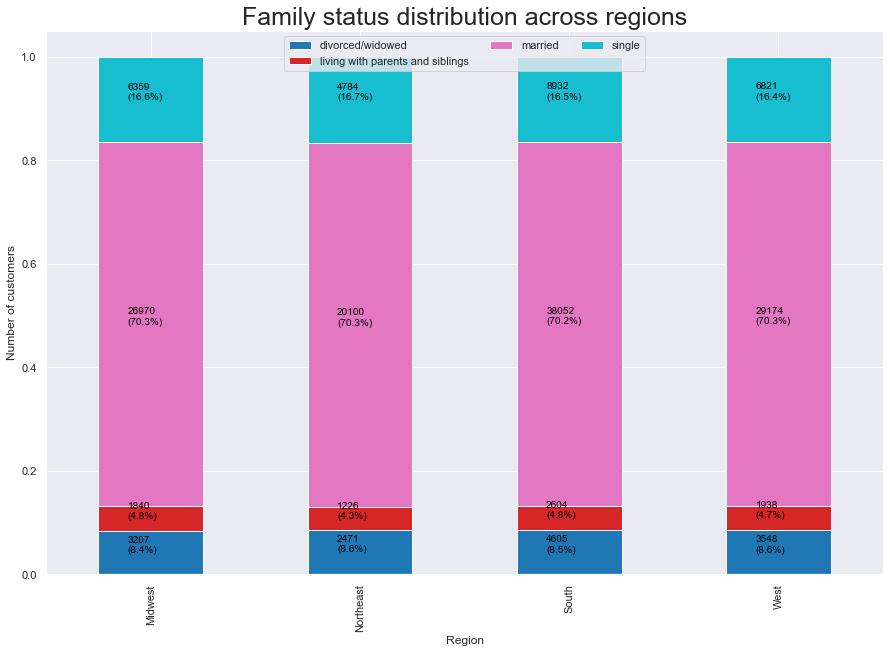

In [142]:
# create stacked 100% bar chart to show proportions

famstat_reg=cross_famstat_region.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(15, 10))

plt.legend(loc="upper center", ncol=3)
plt.title("Family status distribution across regions", fontsize = 25)
plt.xlabel("Region")
plt.ylabel("Number of customers")

# add the percentage information to every bar, using FOR cycle


for n, y in enumerate([*famstat_region_labels.index.values]):
    for (proportion, count, x_loc) in zip(cross_famstat_region.loc[y],
                                         famstat_region_labels.loc[y],
                                          cross_famstat_region.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=10)

In [143]:
# Export stacked bar chart

famstat_reg.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'famstat_region.png'))

In [57]:
# Family status and loyalty

# Crosst tab
loyalty_famstat=pd.crosstab(bereal['fam_status'], bereal['loyalty_flag'].sort_values(ascending=False), normalize="index")
loyalty_famstat

loyalty_flag,Loyal customer,New customer,Regular customer
fam_status,,,
divorced/widowed,0.104982,0.417974,0.477044
living with parents and siblings,0.106467,0.415615,0.477918
married,0.104466,0.422867,0.472667
single,0.104662,0.426643,0.468694


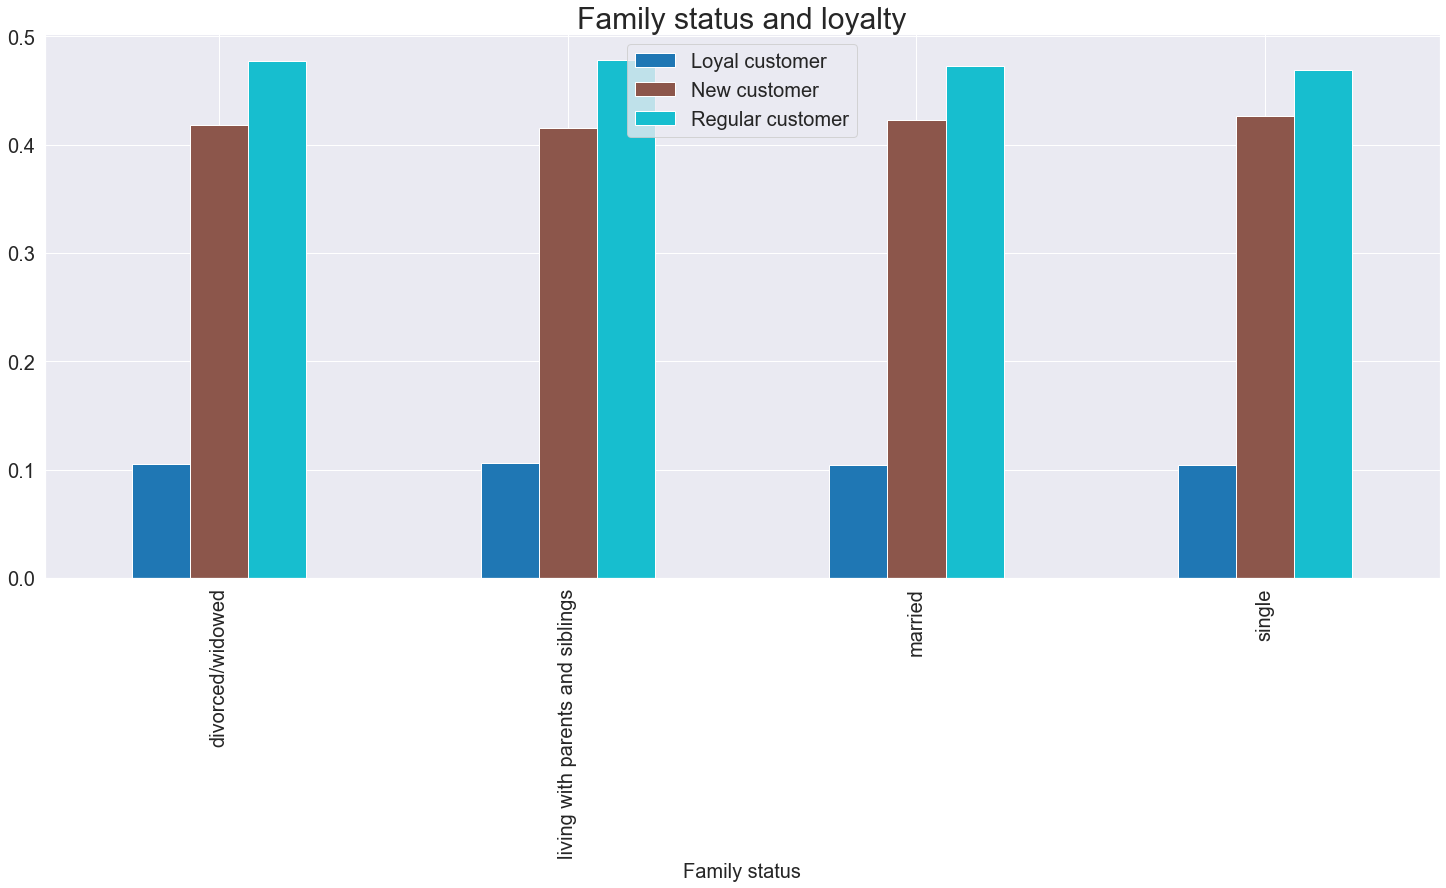

In [59]:
# bar fam stat and loyalty
bar_famstat_loyalty=loyalty_famstat.plot.bar(colormap='tab10', fontsize=20)
plt.title('Family status and loyalty', fontsize=30)
plt.xlabel('Family status', fontsize=20)
plt.legend(fontsize=20)

In [60]:
# Export stacked bar chart

bar_famstat_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_famstat_loyalty.png'))

#### Alcohol purchases per region

In [3]:
# Alcohol purchases across regions

# Crosst tab
alc_region=pd.crosstab(tothemoon['region'], tothemoon['alcohol_flag'].sort_values(ascending=False))
alc_region

alcohol_flag,0,1
region,,
Midwest,6714244,547269
Northeast,5072208,392477
South,9524643,786496
West,7322979,604248


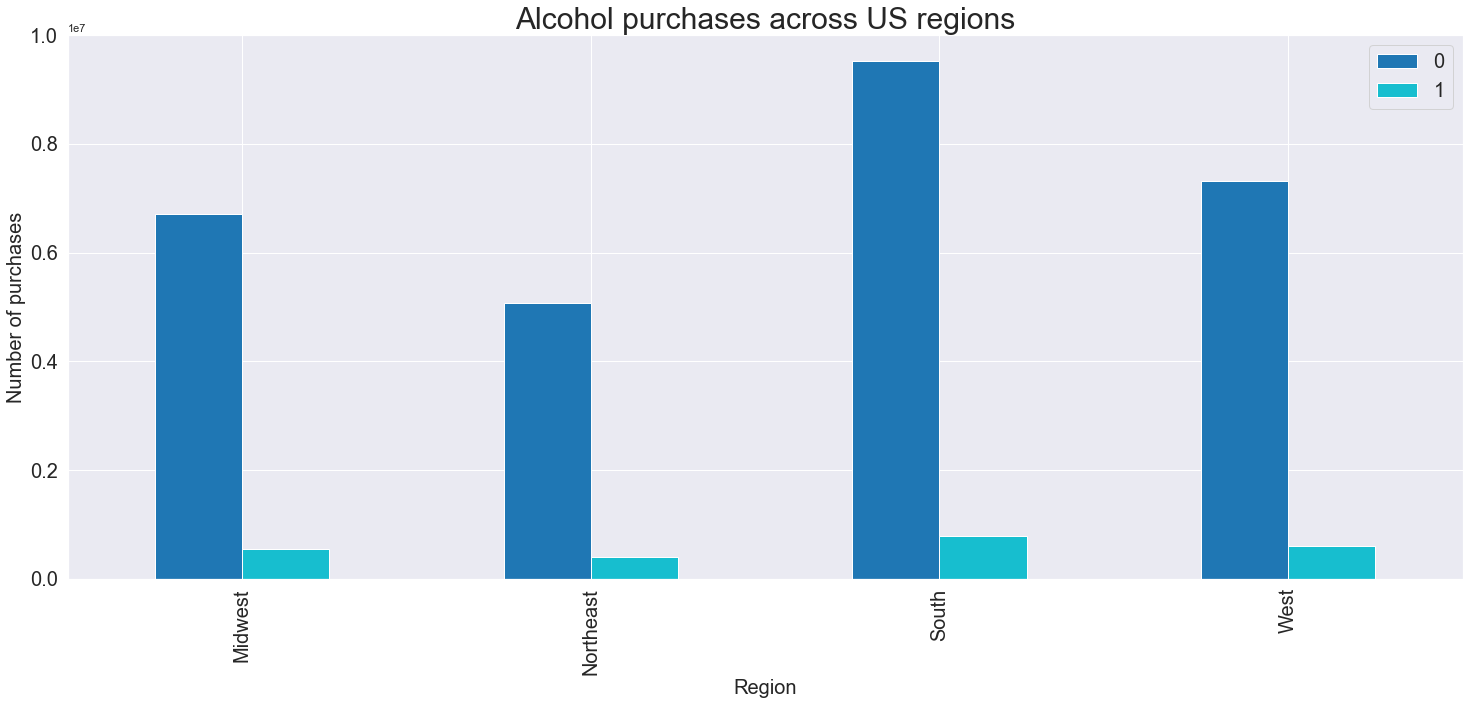

In [14]:
# Grouped bar chart of alcohol purchases by regions
bar_alc_region=alc_region.plot.bar(colormap='tab10', fontsize=20)
plt.title('Alcohol purchases across US regions', fontsize=30)
plt.xlabel('Region', fontsize=20)
plt.ylabel('Number of purchases', fontsize=20)
plt.legend(fontsize=20)

In [11]:
# Export stacked bar chart
bar_alc_region.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_alc_region.png'))

#### Baby items purchases across regions

In [13]:
# Baby items purchases across regions

# Crosst tab
babyitems_region=pd.crosstab(tothemoon['region'], tothemoon['baby_flag'].sort_values(ascending=False))
babyitems_region

baby_flag,0,1
region,,
Midwest,4958232,2303281
Northeast,3715606,1749079
South,7040685,3270454
West,5439788,2487439


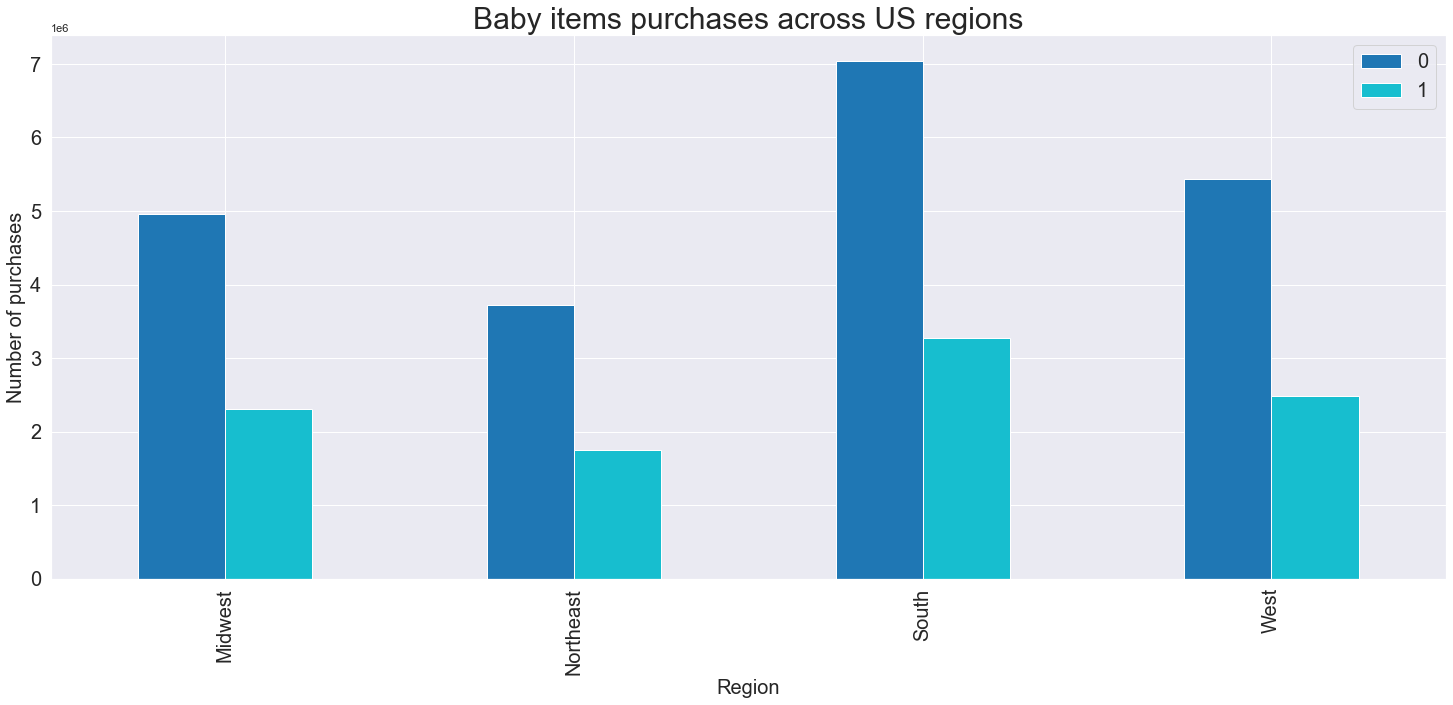

In [15]:
# Grouped bar chart of baby items purchases by regions
bar_babies_region=babyitems_region.plot.bar(colormap='tab10', fontsize=20)
plt.title('Baby items purchases across US regions', fontsize=30)
plt.xlabel('Region', fontsize=20)
plt.ylabel('Number of purchases', fontsize=20)
plt.legend(fontsize=20)

In [16]:
# Export stacked bar chart
bar_babies_region.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_babies_region.png'))

#### International items purchases across regions

In [17]:
# International items purchases across regions

# Crosst tab
inter_region=pd.crosstab(tothemoon['region'], tothemoon['international_flag'].sort_values(ascending=False))
inter_region

international_flag,0,1
region,,
Midwest,2767636,4493877
Northeast,2078676,3386009
South,3959487,6351652
West,2997151,4930076


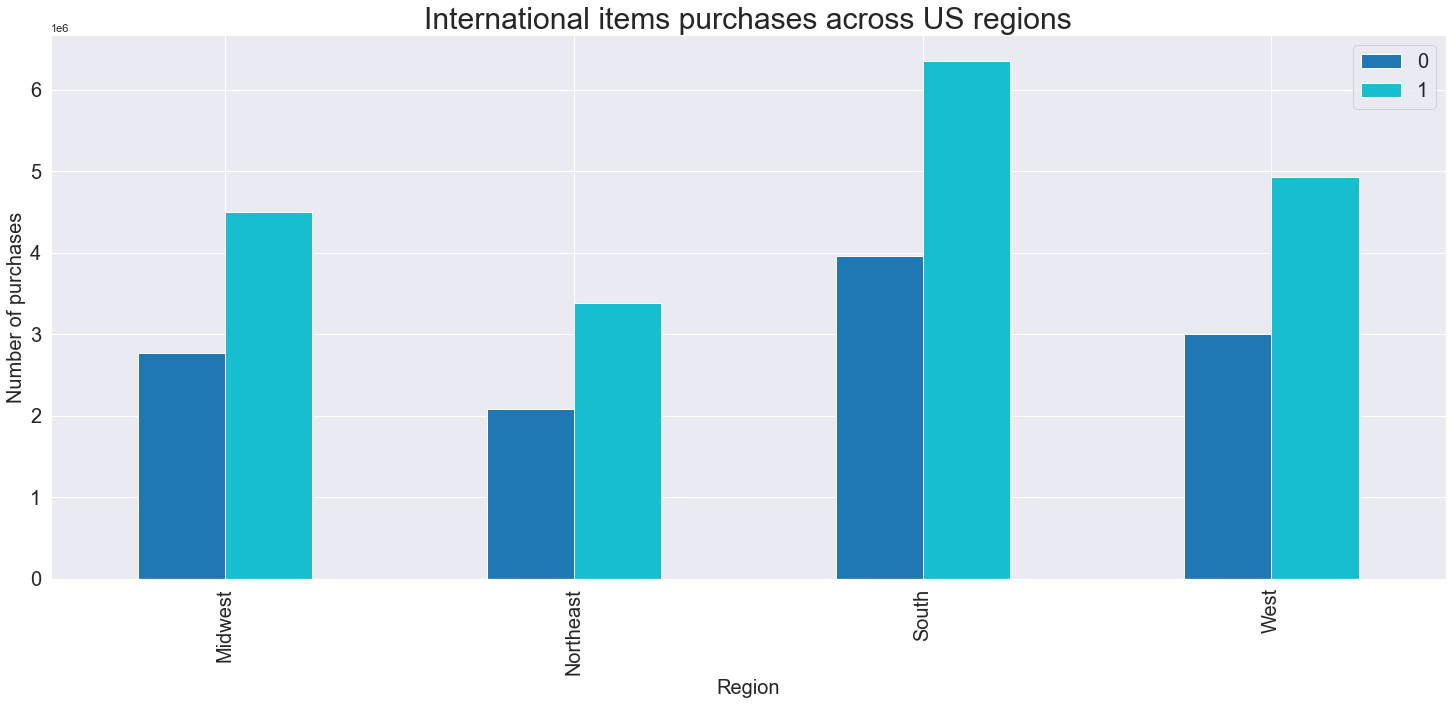

In [29]:
# Grouped bar chart of international items purchases per region
bar_inter_region=inter_region.plot.bar(colormap='tab10', fontsize=20)
plt.title('International items purchases across US regions', fontsize=30)
plt.xlabel('Region', fontsize=20)
plt.ylabel('Number of purchases', fontsize=20)
plt.legend(fontsize=20)

In [19]:
# Export stacked bar chart
bar_inter_region.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_inter_region.png'))

In [9]:
#Distribution of orders by age groups across  departments
age_department=pd.crosstab(tothemoon['department'], tothemoon['age_profile'])
age_department=age_department.reindex(['Young', 'Middle aged', 'Old folks'], axis="columns")
age_department

age_profile,Young,Middle aged,Old folks
department,,,
alcohol,27938,79996,36693
babies,77758,226430,106204
bakery,210358,614473,295997
beverages,477655,1410226,684020
breakfast,128115,367439,175296
bulk,6414,18092,8945
canned goods,192170,552395,267509
dairy eggs,976278,2832832,1368072
deli,188533,550102,265199


In [14]:
# create proportion of age groups purchased per department
cross_age_dept = pd.crosstab(index=tothemoon['department'],
                             columns=tothemoon['age_profile'],
                             normalize="index")
cross_age_dept

age_profile,Middle aged,Old folks,Young
department,,,
alcohol,0.553119,0.253708,0.193173
babies,0.551741,0.258787,0.189473
bakery,0.548231,0.264088,0.187681
beverages,0.548320,0.265959,0.185721
breakfast,0.547722,0.261304,0.190974
bulk,0.540851,0.267406,0.191743
canned goods,0.545805,0.264318,0.189877
dairy eggs,0.547176,0.264250,0.188573
deli,0.548001,0.264186,0.187813


In [75]:
# create proportion of age groups purchased per department
cross_age_dept = pd.crosstab(index=bereal['department'],
                             columns=bereal['age_profile'],
                             normalize="index")
#creating cross tab to display labels
age_frequency_labels=pd.crosstab(index=bereal['department'],columns=bereal['age_profile'])

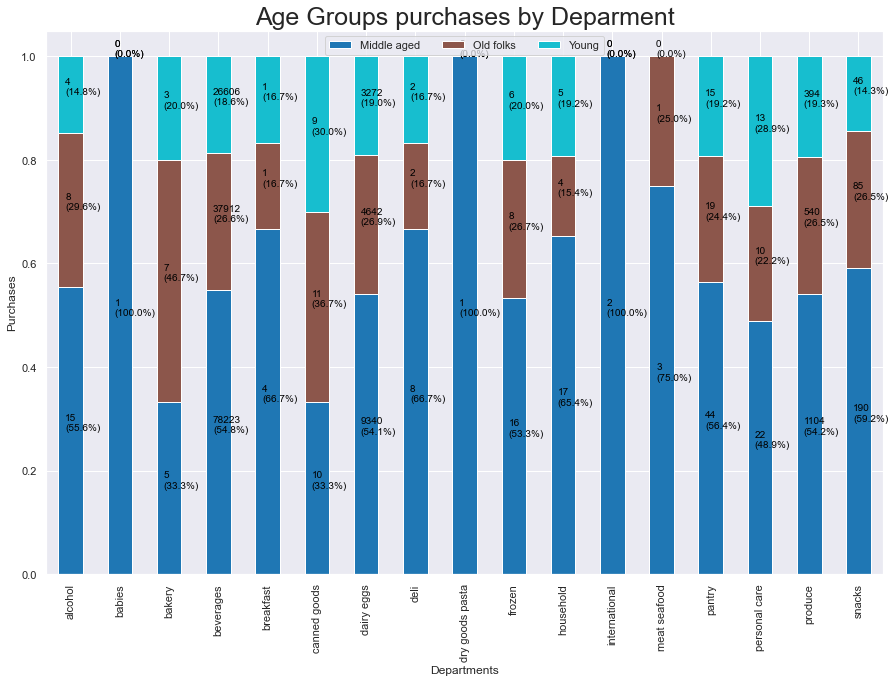

In [120]:
# create stacked 100% bar chart to show proportions

hello=cross_age_dept.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(15, 10))

plt.legend(loc="upper center", ncol=4)
plt.title("Age Groups purchases by Deparment", fontsize = 25)
plt.xlabel("Departments")
plt.ylabel("Purchases")

# add the percentage information to every bar, using FOR cycle


for n, y in enumerate([*age_frequency_labels.index.values]):
    for (proportion, count, x_loc) in zip(cross_age_dept.loc[y],
                                         age_frequency_labels.loc[y],
                                          cross_age_dept.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=10)
    

In [121]:
# Export stacked bar chart

hello.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'age_dept_purchases.png'))

#### Age and frequency flag

In [21]:
# create proportion of age groups and frequency flag
cross_age_frequency = pd.crosstab(index=bereal['age_profile'],
                             columns=bereal['frequency_flag'],
                             normalize="index")
#creating cross tab to display labels
age_frequency_label=pd.crosstab(index=bereal['age_profile'],columns=bereal['frequency_flag'])

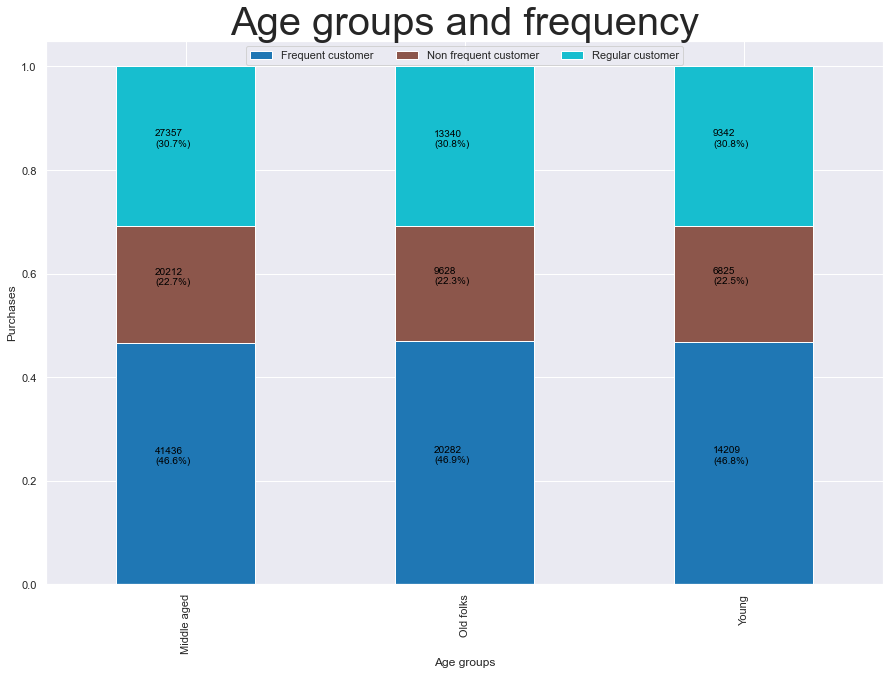

In [22]:
# create stacked 100% bar chart to show proportions

age_frequency=cross_age_frequency.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(15, 10))

plt.legend(loc="upper center", ncol=3)
plt.title("Age groups and frequency", fontsize = 40)
plt.xlabel("Age groups")
plt.ylabel("Purchases")

# add the percentage information to every bar, using FOR cycle


for n, y in enumerate([*age_frequency_label.index.values]):
    for (proportion, count, x_loc) in zip(cross_age_frequency.loc[y],
                                         age_frequency_label.loc[y],
                                          cross_age_frequency.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=10)

In [23]:
# Export stacked bar chart

age_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'age_frequencyflag.png'))

#### Age and Loalty

In [24]:
# create proportion of age groups and loyalty flag
cross_age_loyalty = pd.crosstab(index=bereal['age_profile'],
                             columns=bereal['loyalty_flag'],
                             normalize="index")
#creating cross tab to display labels
age_loyalty_labels=pd.crosstab(index=bereal['age_profile'],columns=bereal['loyalty_flag'])

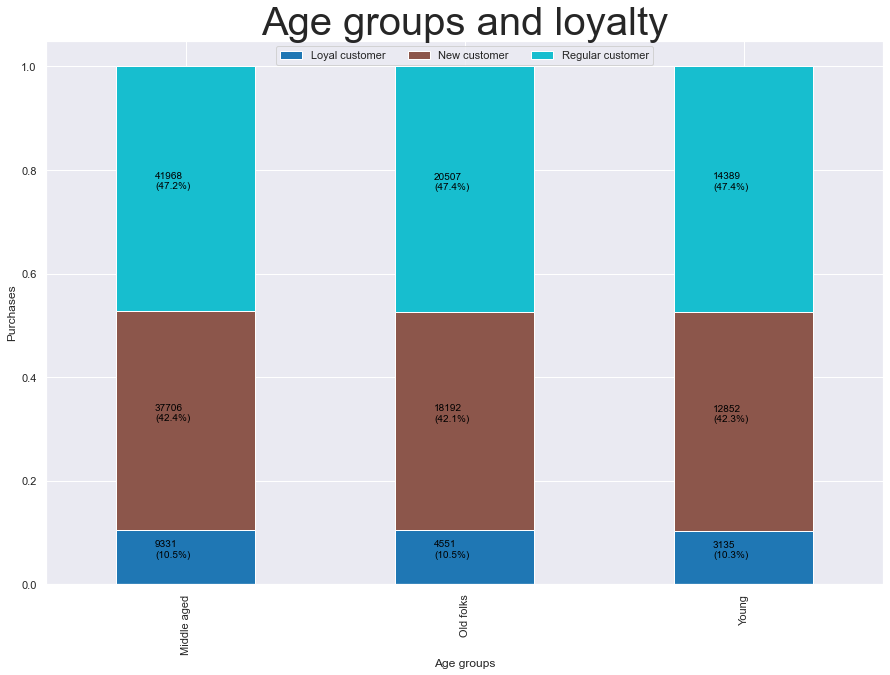

In [25]:
# create stacked 100% bar chart to show proportions

age_loaylty=cross_age_loyalty.plot(kind='bar', 
                     stacked=True,
                    colormap='tab10', 
                    figsize=(15, 10))

plt.legend(loc="upper center", ncol=3)
plt.title("Age groups and loyalty", fontsize = 40)
plt.xlabel("Age groups")
plt.ylabel("Purchases")

# add the percentage information to every bar, using FOR cycle


for n, y in enumerate([*age_loyalty_labels.index.values]):
    for (proportion, count, x_loc) in zip(cross_age_loyalty.loc[y],
                                         age_loyalty_labels.loc[y],
                                          cross_age_loyalty.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=10)

In [26]:
# export chart
age_loaylty.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'age_loyaltyflag.png'))

In [43]:
# create proportion loyalty and price range
cross_loyalty_pricerange = pd.crosstab(index=bereal['price_range_loc'],
                             columns=bereal['loyalty_flag'],
                             normalize="index")
#creating cross tab to display labels
loyalty_pricerange_labels=pd.crosstab(index=bereal['price_range_loc'],columns=bereal['loyalty_flag'])

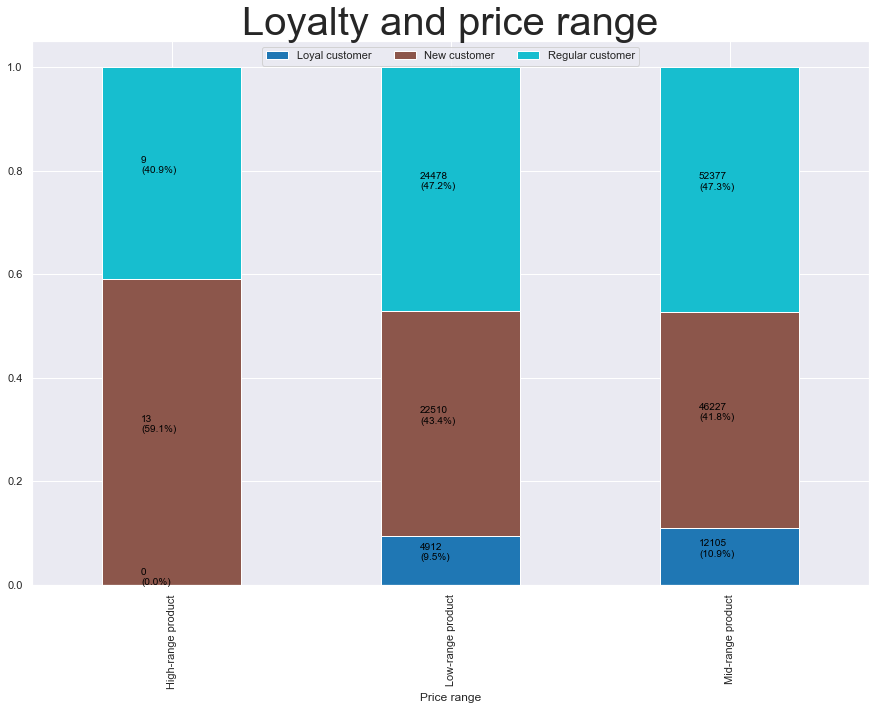

In [44]:
# create stacked 100% bar chart to show proportions

loyalty_pricerange=cross_loyalty_pricerange.plot(kind='bar', 
                     stacked=True,
                    colormap='tab10', 
                    figsize=(15, 10))

plt.legend(loc="upper center", ncol=3)
plt.title("Loyalty and price range", fontsize = 40)
plt.xlabel("Price range")

# add the percentage information to every bar, using FOR cycle


for n, y in enumerate([*loyalty_pricerange_labels.index.values]):
    for (proportion, count, x_loc) in zip(cross_loyalty_pricerange.loc[y],
                                         loyalty_pricerange_labels.loc[y],
                                          cross_loyalty_pricerange.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=10)

In [45]:
# export chart
loyalty_pricerange.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'loyalty_pricerange.png'))

#### Alcohol drinkers and age group

In [125]:
# create a crosstab
cross_alcohol_age = pd.crosstab(index=bereal['age_profile'],
                             columns=bereal['alcohol_flag'].sort_values(ascending=False))
cross_alcohol_age

alcohol_flag,0,1
age_profile,,
Middle aged,81749,7256
Old folks,39797,3453
Young,27934,2442


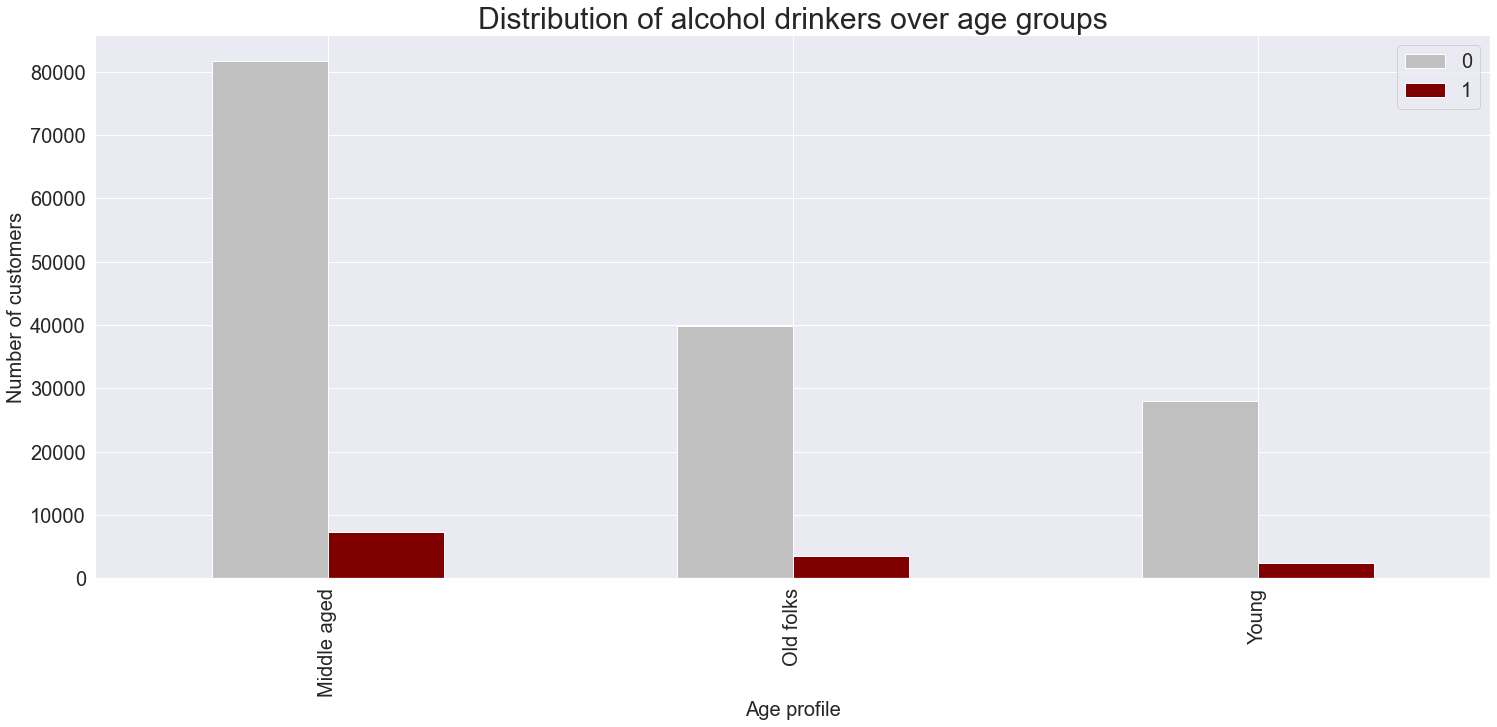

In [134]:
# Grouped bar chart of alcohol drinkers per age group
bar_aclohol_age=cross_alcohol_age.plot.bar(color=['silver', 'maroon'], fontsize=20)
plt.title('Distribution of alcohol drinkers over age groups', fontsize=30)
plt.xlabel('Age profile', fontsize=20)
plt.ylabel('Number of customers', fontsize=20)
plt.legend(fontsize=20)

In [135]:
# export chart
bar_aclohol_age.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'alcohol_age.png'))

#### Alcohol drinkers and family status

In [144]:
# create a crosstab
cross_alcohol_famstat = pd.crosstab(index=bereal['fam_status'],
                             columns=bereal['alcohol_flag'].sort_values(ascending=False))
cross_alcohol_famstat

alcohol_flag,0,1
fam_status,,
divorced/widowed,12745,1086
living with parents and siblings,6958,650
married,105042,9254
single,24735,2161


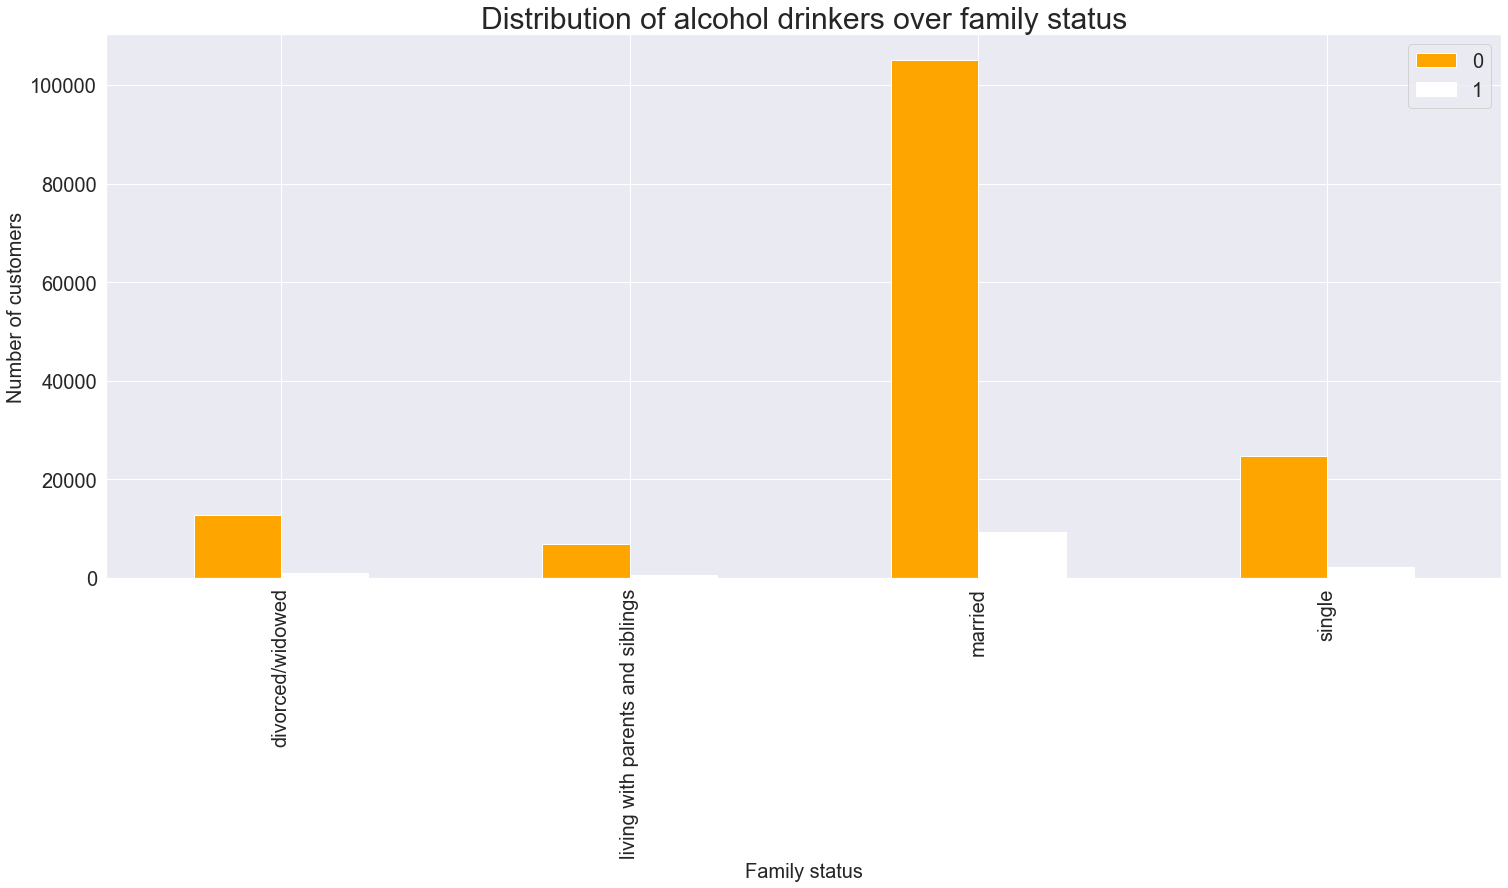

In [151]:
# Grouped bar chart of alcohol drinkers per family status
bar_aclohol_famstat=cross_alcohol_famstat.plot.bar(color=['orange', 'white'], fontsize=20)
plt.title('Distribution of alcohol drinkers over family status', fontsize=30)
plt.xlabel('Family status', fontsize=20)
plt.ylabel('Number of customers', fontsize=20)
plt.legend(fontsize=20)

In [146]:
# export chart
bar_aclohol_famstat.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'alcohol_famstat.png'))

#### Age and family status

In [130]:
# create a crosstab
cross_age_famstat = pd.crosstab(index=bereal['age_profile'],
                             columns=bereal['fam_status'].sort_values(ascending=False))
cross_age_famstat

fam_status,divorced/widowed,living with parents and siblings,married,single
age_profile,,,,
Middle aged,3128,0,66683,19194
Old folks,10703,0,32547,0
Young,0,7608,15066,7702


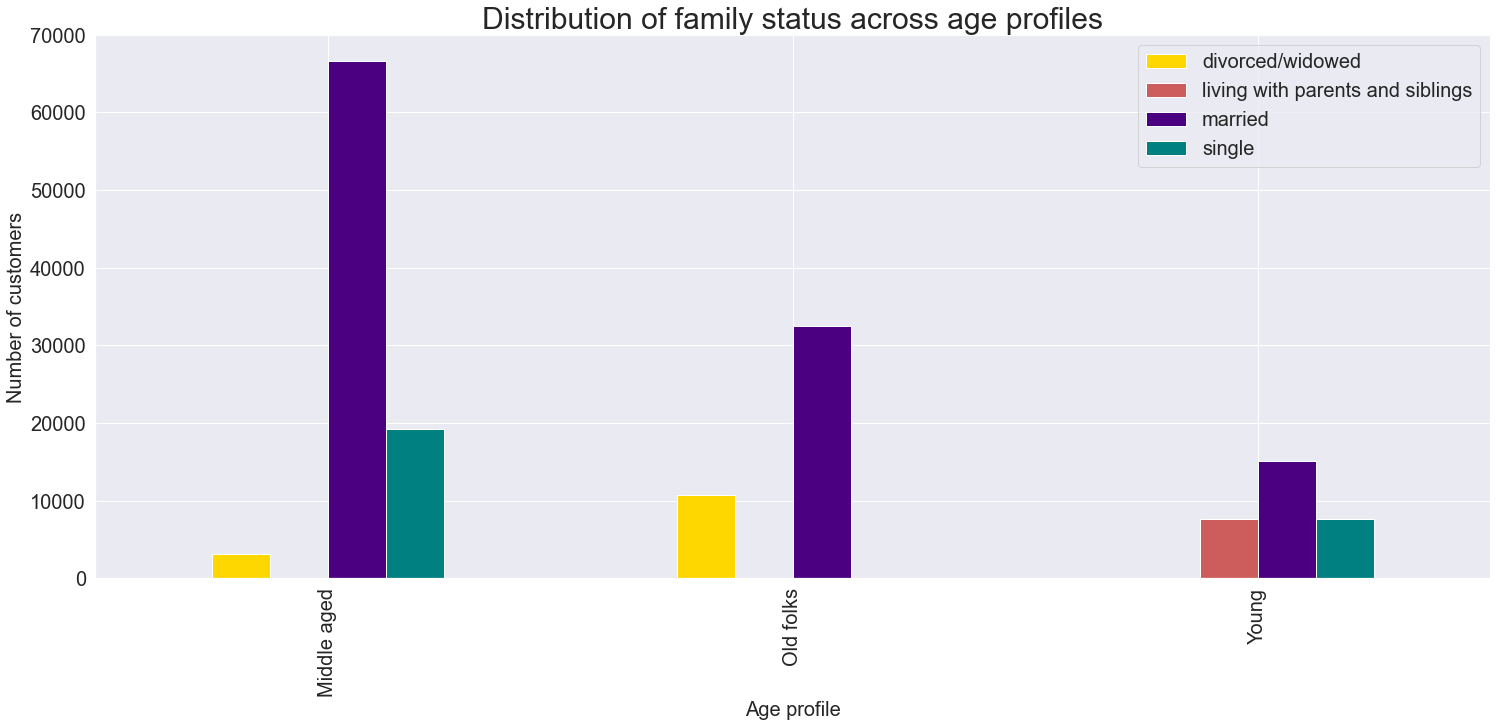

In [136]:
# Grouped bar chart of alcohol drinkers per age group
bar_age_famstat=cross_age_famstat.plot.bar(color=['gold', 'indianred', 'indigo', 'teal'], fontsize=20)
plt.title('Distribution of family status across age profiles', fontsize=30)
plt.xlabel('Age profile', fontsize=20)
plt.ylabel('Number of customers', fontsize=20)
plt.legend(fontsize=20)

In [137]:
# export chart
bar_age_famstat.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'age_famstat.png'))

# Additional visualisations

In [39]:
#Dataframe for plotting linechart for orders
days_per_week=tothemoon['orders_day_of_week'].value_counts().rename_axis('day_of_week').to_frame(name='counts')
days_per_week=day_week.rename({0:'Saturday', 1:'Sunday', 2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday'})
days_per_week=day_week.reindex(['Saturday', 'Sunday', 'Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday'])
days_per_week

,counts
day_of_week,
Saturday,5908610
Sunday,5411686
Monday,4024706
Tuesday,3669535
Wednesday,3624994
Thursday,4033729
Friday,4291304


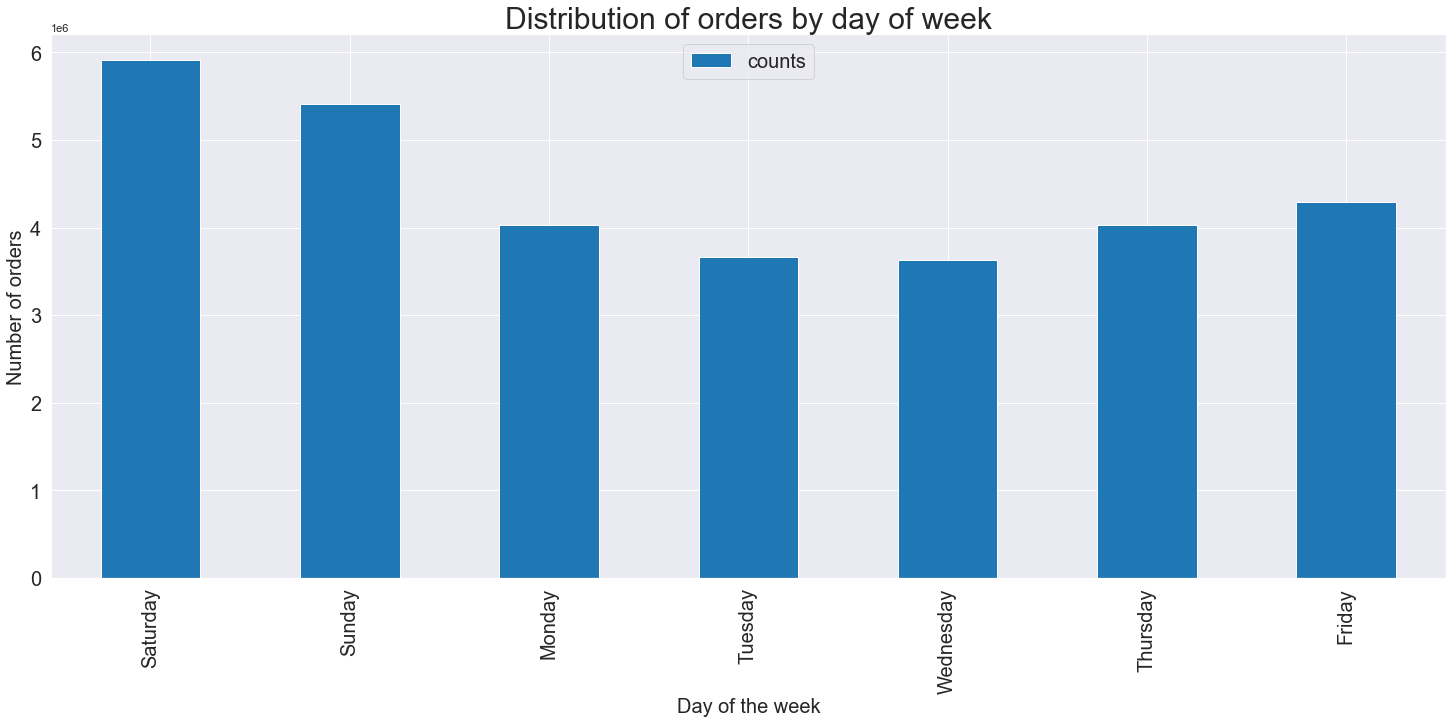

In [40]:
#Bar chart of orders by day of week
bar_days_orders=days_per_week.plot.bar(colormap='tab10', fontsize=20)
plt.title('Distribution of orders by day of week', fontsize=30)
plt.xlabel('Day of the week', fontsize=20)
plt.ylabel('Number of orders', fontsize=20)
plt.legend(loc='upper center', fontsize=20)

In [41]:
# export chart
bar_days_orders.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_days_orders.png'))

In [43]:
# Dataframe for plotting linechart for orders
hourly_orders=tothemoon['order_hour_of_day'].value_counts().rename_axis('Hour_of_day').reset_index(name='Counts')
hourly_orders

,Hour_of_day,Counts
0,10,2649744
1,11,2614880
2,14,2567903
3,13,2539276
4,15,2535966
5,12,2495795
6,16,2413681
7,9,2363611
8,17,1982345
9,8,1659110


Text(0, 0.5, 'Number of orders')

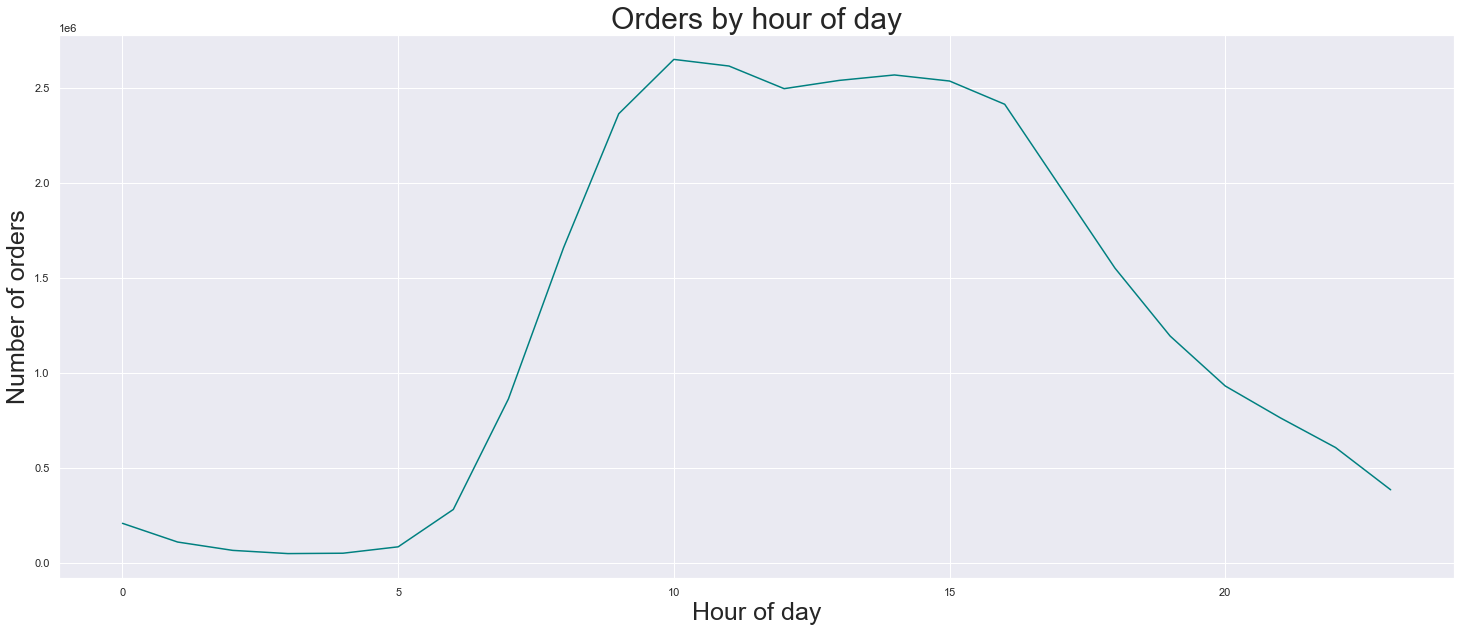

In [46]:
# Line chart for orders by hour of day
line_hourly_orders=sns.lineplot( data=hourly_orders, x='Hour_of_day', y='Counts', color = 'teal')
line_hourly_orders.axes.set_title("Orders by hour of day",fontsize=30)
line_hourly_orders.set_xlabel("Hour of day",fontsize=25)
line_hourly_orders.set_ylabel("Number of orders",fontsize=25)


In [59]:
# export chart
line_hourly_orders.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_hourly_orders.png'))

<AxesSubplot:title={'center':'Products by price range'}, ylabel='price_range_loc'>

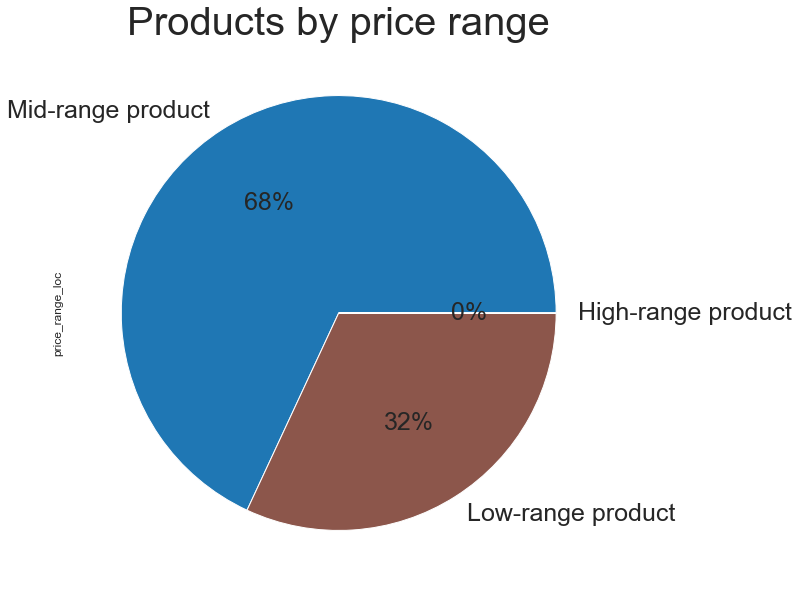

In [22]:
# Prices range distribution

# Create a sub data set of products by price range
range_dist=bereal['price_range_loc'].value_counts(dropna=False)
pie_range_dist=range_dist.plot.pie(autopct=('%1.f%%'), colormap='tab10', textprops={'fontsize': 25})
pie_range_dist.set_title("Products by price range",fontsize=40)
pie_range_dist

In [23]:
# export chart
pie_range_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'pie_price_range.png'))

<AxesSubplot:title={'center':'Orders by price range'}, ylabel='price_range_loc'>

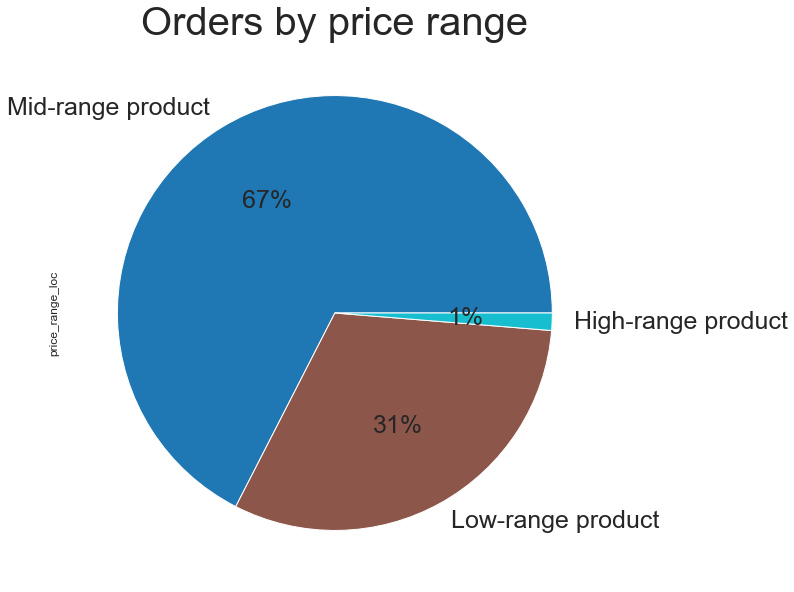

In [20]:
# Orders range distribution

# Create a sub data set of orders by price range
orders_range=tothemoon['price_range_loc'].value_counts(dropna=False)
pie_orders_range=orders_range.plot.pie(autopct=('%1.f%%'), colormap='tab10', textprops={'fontsize': 25})
pie_orders_range.set_title("Orders by price range",fontsize=40)
pie_orders_range

In [21]:
# export chart
pie_orders_range.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'pie_orders_range.png'))

<AxesSubplot:title={'center':'Loyalty of customers to brand'}>

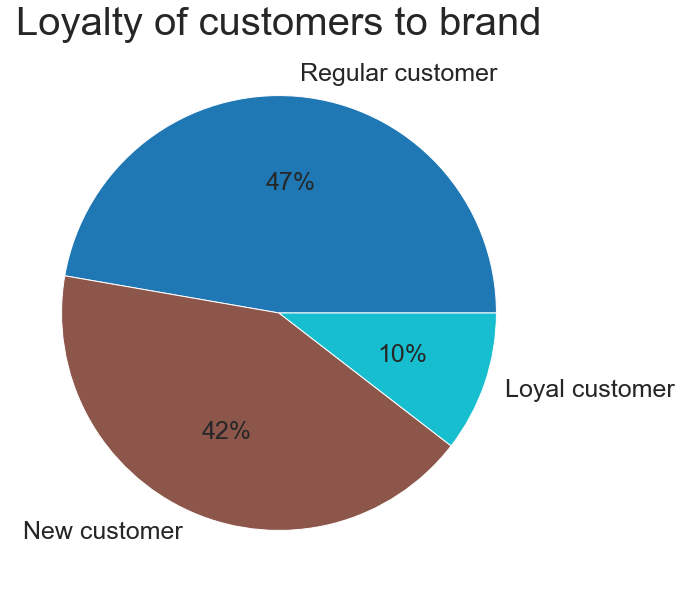

In [33]:
# Loyalty of customers
cust_loyalty=bereal['loyalty_flag'].value_counts(dropna=False)
pie_loyalty=cust_loyalty.plot.pie(autopct=('%1.f%%'),label='', colormap='tab10', textprops={'fontsize': 25})
pie_loyalty.set_title("Loyalty of customers to brand",fontsize=40)
pie_loyalty


In [35]:
# export chart
pie_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'pie_loyalty.png'))

<AxesSubplot:title={'center':'Orders based on Loyalty'}>

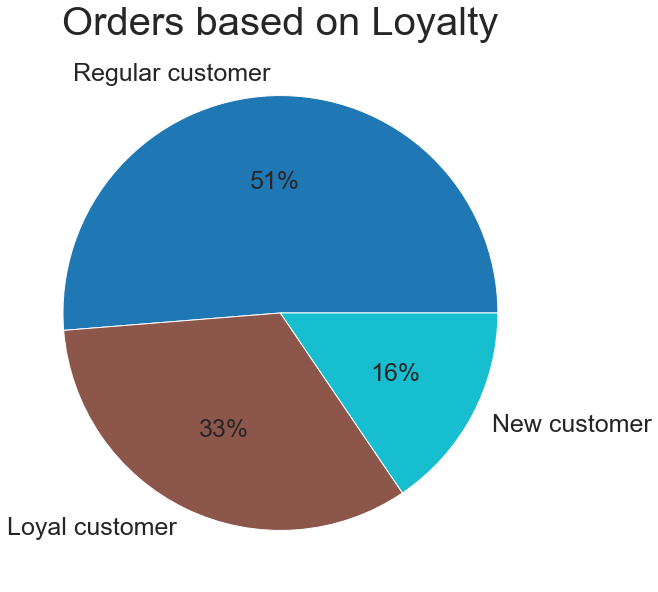

In [37]:
# Orders based on loyalty
orders_loyalty=tothemoon['loyalty_flag'].value_counts(dropna=False)
pie_loyalty_ord=orders_loyalty.plot.pie(autopct=('%1.f%%'),label='', colormap='tab10', textprops={'fontsize': 25})
pie_loyalty_ord.set_title("Orders based on Loyalty",fontsize=40)
pie_loyalty_ord


In [38]:
# export chart
pie_loyalty_ord.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'pie_loyalty_ord.png'))

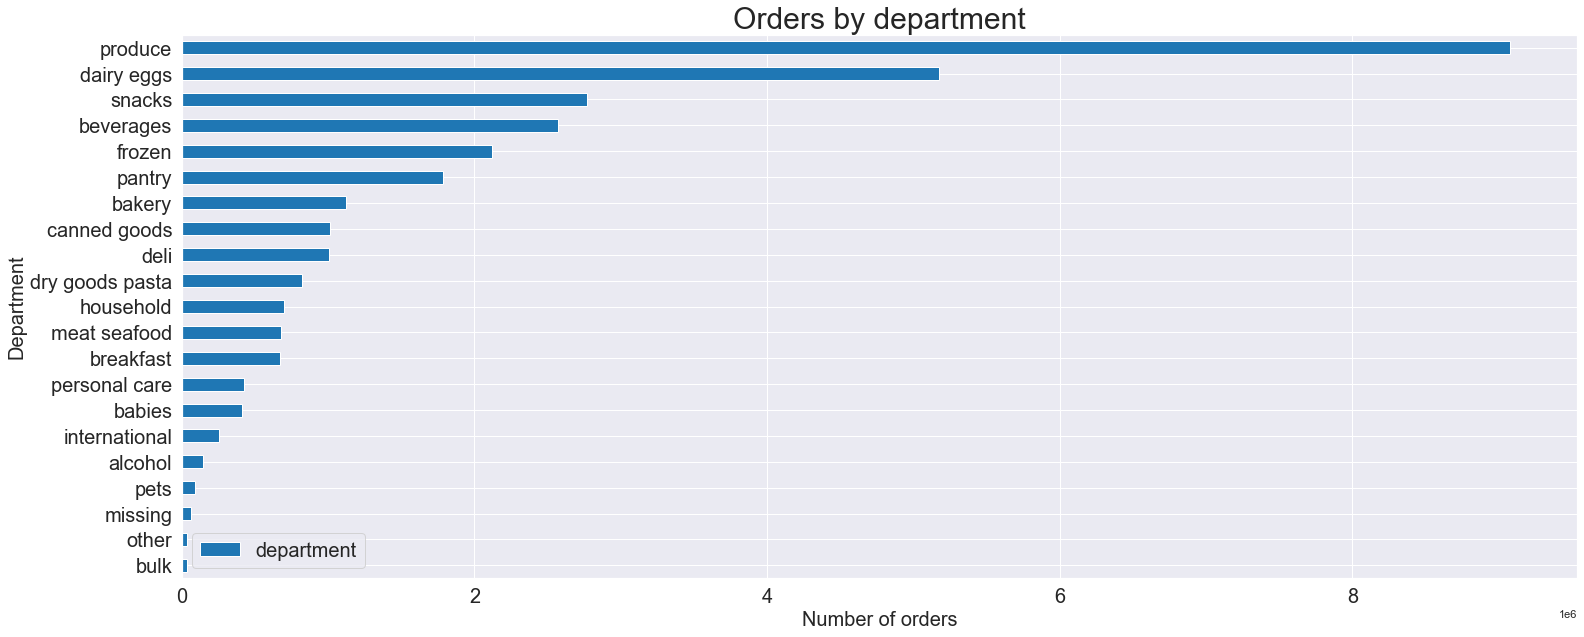

In [7]:
# Number of orders across departments
bar_department_orders=tothemoon['department'].value_counts(dropna=False).sort_values(ascending=True).plot.barh(colormap='tab10', fontsize=20)
plt.title('Orders by department', fontsize=30)
plt.xlabel('Number of orders', fontsize=20)
plt.ylabel('Department', fontsize=20)
plt.legend(fontsize=20)

In [8]:
# export chart
bar_department_orders.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_department_orders.png'))